<a href="https://colab.research.google.com/github/Paulsob/TelecomLabs/blob/main/Lab03_telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Упражнение 3

In [ ]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

from thinkdsp import Chirp, PI2, normalize, unbias, read_wave
import numpy as np

Пункт 1

В файле chap03.ipynb изучаются компоненты библиотеки ThinkDSP:

Класс Chirp для работы с чирп-сигналами

Функция hamming() для создания окна Хэмминга

Методы построения и анализа спектрограмм

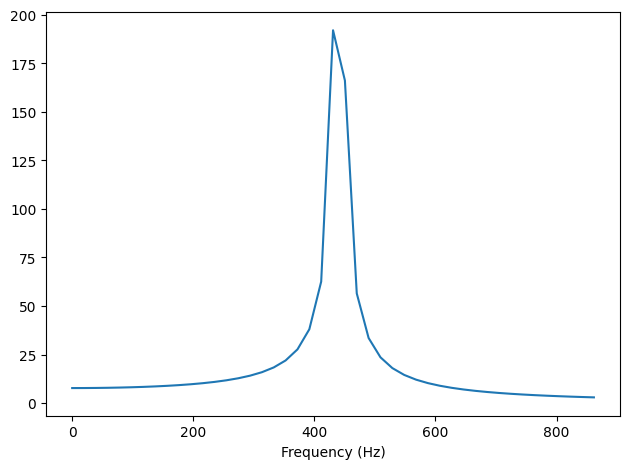

In [ ]:
import numpy as np
from thinkdsp import SinSignal, decorate
signal = SinSignal(freq=440)
duration = signal.period * 22.45
wave = signal.make_wave(duration)
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')

Приведен альтернативный пример с использованием окна Бартлетта вместо Хэмминга:

Создан сегмент с дробным числом периодов - на графике наблюдается выраженная спектральная утечка

Применение окна Бартлетта дает результат:

Уменьшение утечки по краям основного пика

Полного устранения эффекта не происходит

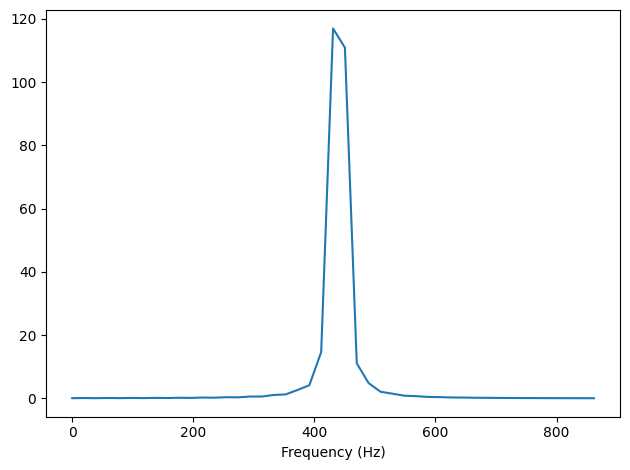

In [ ]:
wave.ys *= np.bartlett(len(wave.ys))
spectrum = wave.make_spectrum()
spectrum.plot(high=880)

decorate(xlabel='Frequency (Hz)')

Пункт 2

In [ ]:
class SawtoothChirp(Chirp):
    def evaluate(self, ts):
        freqs = np.linspace(self.start, self.end, len(ts))
        dts = np.diff(ts, prepend=0)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        cycles = phases / PI2
        frac, _ = np.modf(cycles)
        ys =  normalize(unbias(frac), self.amp)
        return ys

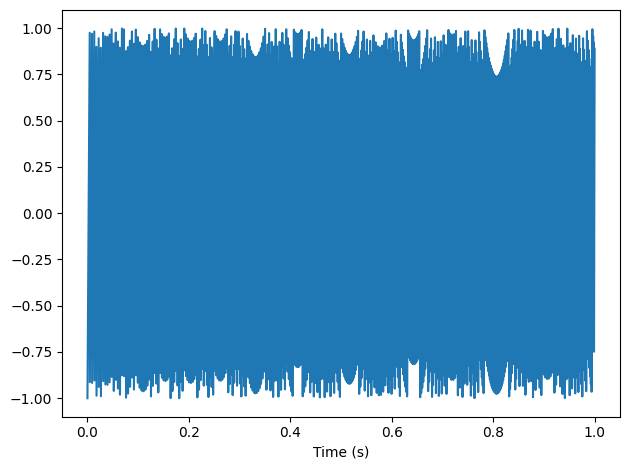

In [ ]:
signal = SawtoothChirp(start=220, end=660)
wave = signal.make_wave(duration=1, framerate=4025)
wave.segment(start=0, duration=1).plot()
decorate(xlabel='Time (s)')

In [ ]:
wave.make_audio()

Построенная спектрограмма четко отображает эффект биений

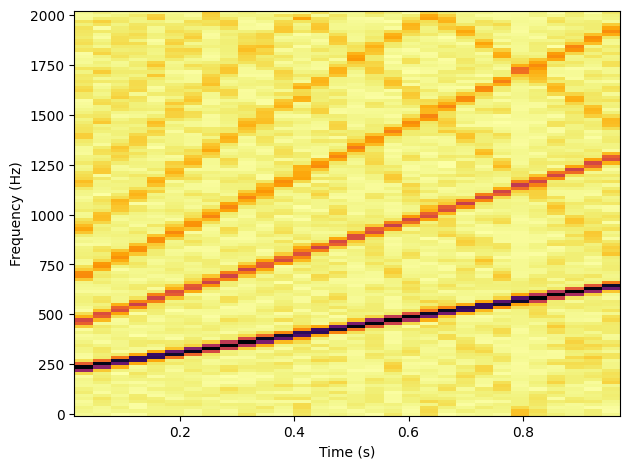

In [ ]:
sp = wave.make_spectrogram(256)
sp.plot()
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

Пункт 3

Создан пилообразный чирп с параметрами:

Линейное изменение частоты: 2500-3000 Гц

Длительность: 1 секунда

Частота дискретизации: 20 кГц

Спектрограмма показывает плавный рост частоты в первые 2.5 секунды

In [ ]:
new_stchirp = SawtoothChirp(start=2500, end=3000)
new_stwave = new_stchirp.make_wave(duration=1, framerate=20000)
new_stwave.make_audio()

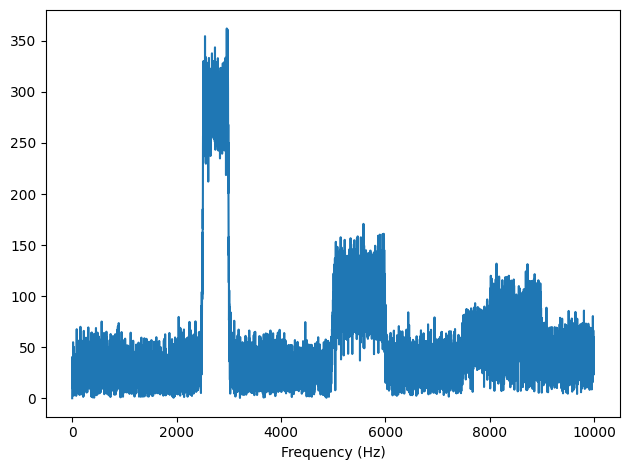

In [ ]:
new_stwave.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

Пункт 4

In [ ]:
glissando_wave = read_wave(filename='/content/Rhapsody.wav')
trimmed_wave = glissando_wave.segment(start=0, duration=60)
trimmed_wave.make_audio()

Сгенерирован сигнал, имитирующий глиссандо тромбона (A3→F3→A3):

По звучанию занимает промежуточное положение между линейным и экспоненциальным чирпами

Спектрограмма демонстрирует:

Нелинейное изменение частоты

Более медленный рост скорости изменения частоты по сравнению с экспоненциальным чирпом

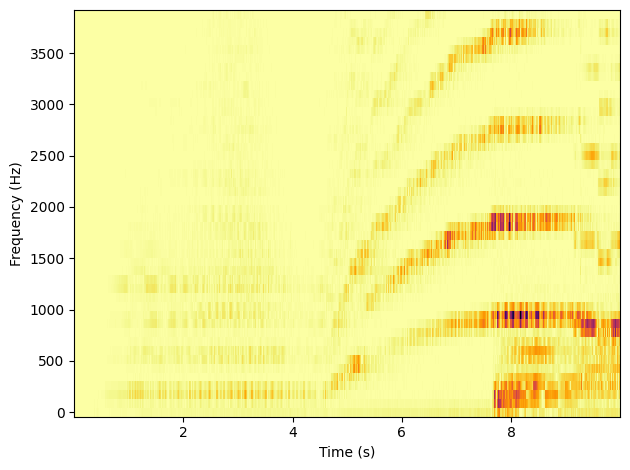

In [ ]:
trimmed_wave.segment(start=0, duration=10).make_spectrogram(512).plot(high=4000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

Пункт 5

In [ ]:
class TromboneGliss(Chirp):
    def evaluate(self, ts):
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = np.linspace(l1, l2, len(ts))
        freqs = 1 / lengths

        dts = np.diff(ts, prepend=0)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        ys = self.amp * np.cos(phases)
        return ys

In [ ]:
a3 = 220
f3 = 349
a3f3a3 = TromboneGliss(a3, f3).make_wave(duration=1) | TromboneGliss(f3, a3).make_wave(duration=1)
a3f3a3.make_audio()

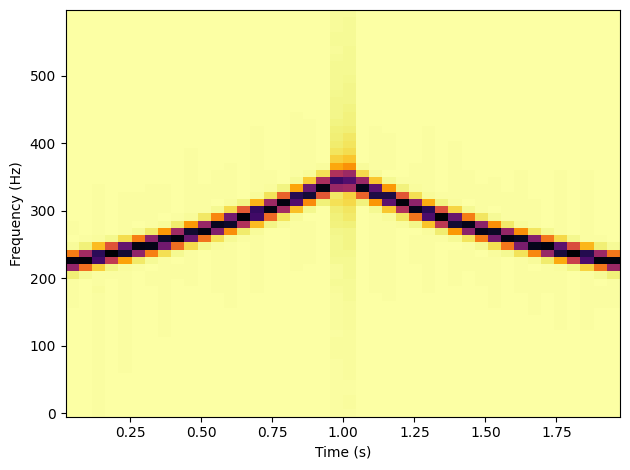

In [ ]:
a3f3a3.make_spectrogram(1024).plot(high=600)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

Пункт 6

In [ ]:
vowels = read_wave(filename='vowels.wav')
vowels.make_audio()

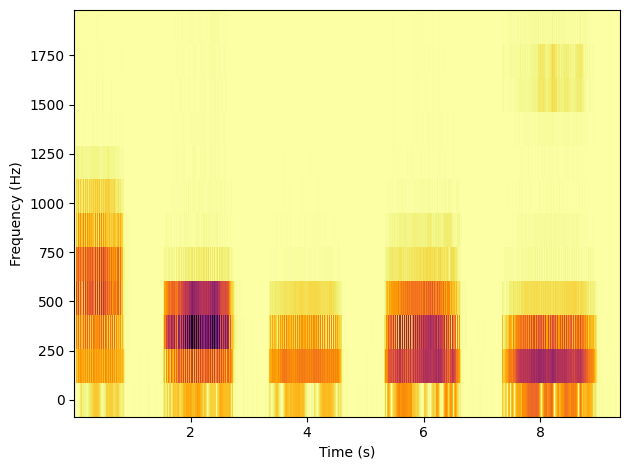

In [ ]:
vowels.segment(start=0, duration=10).make_spectrogram(256).plot(high=2000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

Исследование спектрограмм гласных показало:

Общие характеристики при различиях в тембре и высоте

Уникальную спектральную картину для каждого звука

Перспективы применения в:

Распознавании речи

Синтезе голоса

Разработке голосовых ассистентов

